# HOTEL BOOKING DEMAND EDA

## Purpose

I will only cover some basic EDA in this notebook. I hope it somehow helps people who is also a beginner in EDA and viz like me! Any comment or input is welcome!

## Acknowledgement

I will start with the explanation of the dataset.

This dataset is not mine and was retrieved from https://www.kaggle.com/jessemostipak/hotel-booking-demand on August 11, 2020.

This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.(https://www.sciencedirect.com/science/article/pii/S2352340918315191)

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields.



## Variables Explanation

Explanation of the variables:
1. hotel : The name of the hotel observed (camouflaged) (H1 = Resort Hotel or H2 = City Hotel). 
2. is_canceled: Value indicating if the booking was canceled (1) or not (0)
3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. arrival_date_year: Year of arrival date
5. arrival_date_month: Month of arrival date
6. arrival_date_week_number: Week number of year for arrival date
7. arrival_date_day_of_month: Day of arrival date
8. stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
9. stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
10. adults: Number of adults
11. children: Number of children
12. babies: Number of babies
13. meal: Type of meal booked. Categories are presented in standard hospitality meal packages:	BO, BL and ML
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)
14. country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
15. market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16. distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
17. is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
18. previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
19. previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
21. assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
22. booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
23. deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
24. agent: ID of the travel agency that made the booking
25. company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
26. days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
27. customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking
28. adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
29. required_car_parking_spaces: Number of car parking spaces required by the customer
30. total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
31. reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed;
No-Show – customer did not check-in and did inform the hotel of the reason why
32. reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Exploratory Data Analysis

Let's first import the necessary libraries for doing EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# hotel=pd.read_csv("E:\Small Projects\Hotel Booking\hotel_bookings.csv")
hotel=pd.read_csv("/content/drive/My Drive/Colab Notebooks/EDA/hotel_bookings.csv")

In [ ]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

What questions can we answer from the data provided?
These are some of the questions I can think of.
1. how is the correlation between numeric datas?
2. how big is the cancellation rate?
3. do people who keep changing their plan, more unlikely to cancel their bookings?
4. do people who have the record of canceling their plan are more likely to cancel again?
5. do people who plan their trip shortly before are more unlikely to cancel the bookings?
6. how has the cancelation rate changed year by year?
7. how is the proportion of repeated customers do they have compared to new guests?
8. how long do people with children and babies stay in general? are they staying for longer time or shorter time?
9. how often do people get different assigned_room_type from their reserved_room_type?


### 1. How is the correlation between numeric datas?

In [ ]:
hotel.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


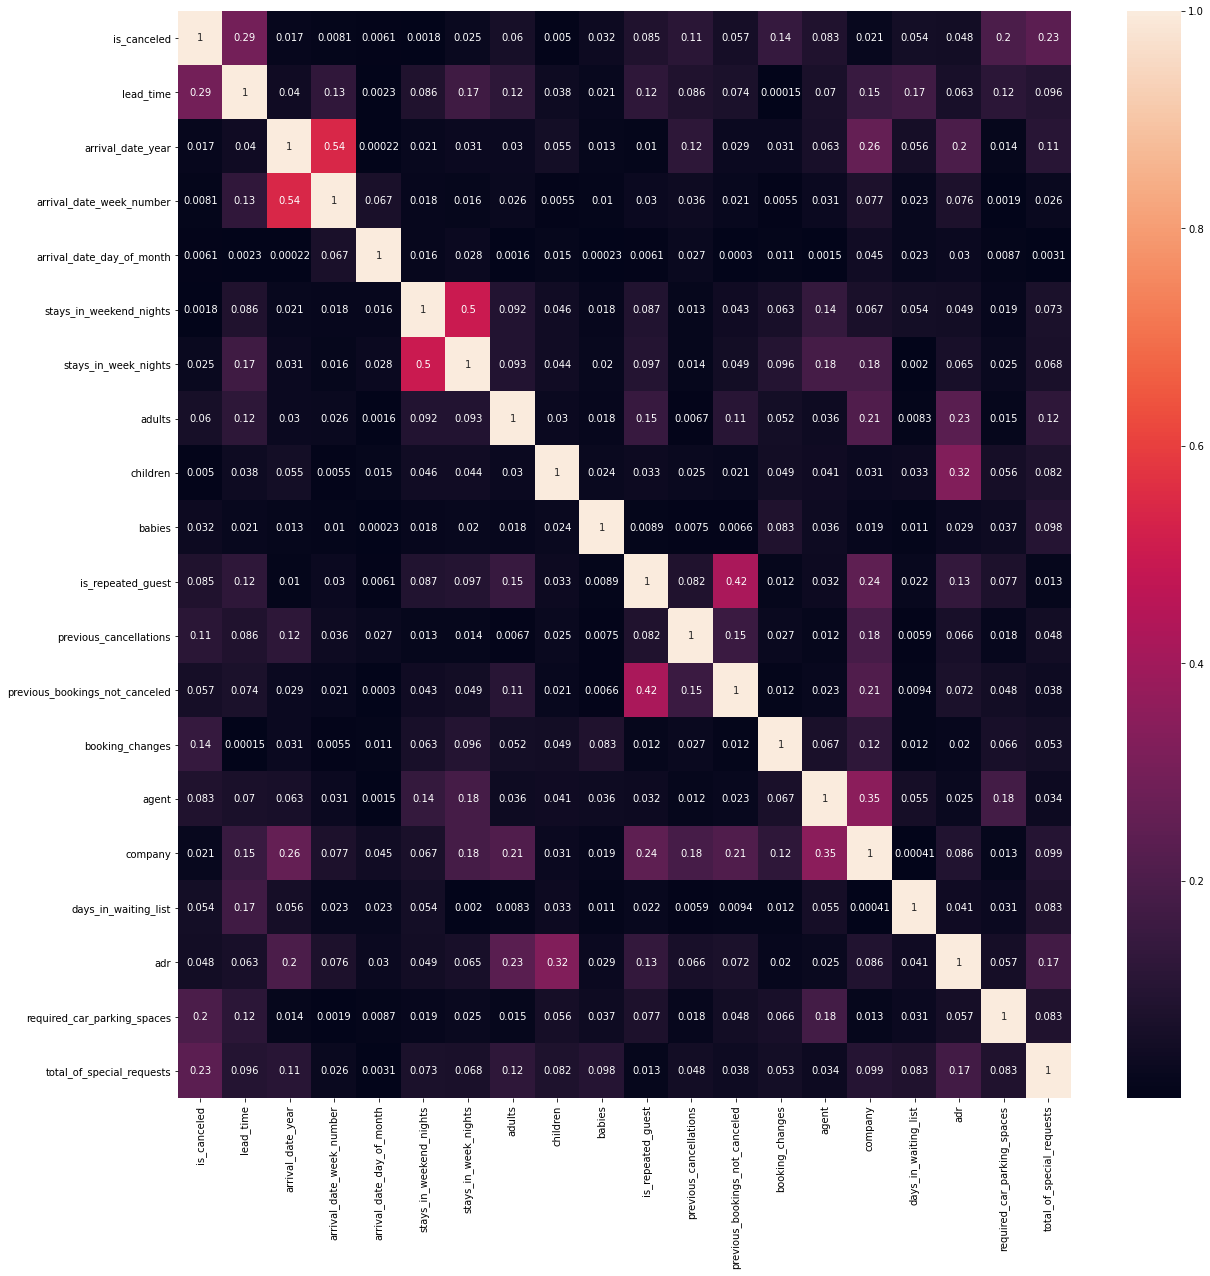

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(hotel.corr()),annot=True)

it seems none of the features are too highly correlated. the highest are between arrival date week and the arrival date year, and between stays in weekend nights and stays in week nights, which kinda make sense -sort of.

### 2. How big is the cancellation rate?

In [ ]:
cancel_sizes=hotel["is_canceled"].value_counts()

In [ ]:
cancel_label=hotel["is_canceled"].unique()

([<matplotlib.patches.Wedge at 0x7fac090e5198>,
 [Text(-0.4355420495755465, 1.0101005509609093, '0'),
  Text(0.47513678135514203, -1.1019278737755371, '1')],
 [Text(-0.2375683906775708, 0.5509639368877687, '63.0%'),
  Text(0.2771631224571662, -0.6427912597023966, '37.0%')])

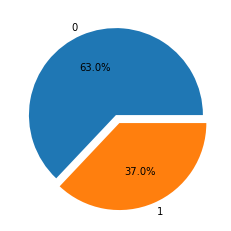

In [ ]:
plt.pie(cancel_sizes,labels=cancel_label, explode=[0, 0.1], autopct='%1.1f%%')

Let's also find out the proportion of the canceled and not canceled rate between the two hotels.

In [ ]:
hotel.groupby("hotel")["is_canceled"].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

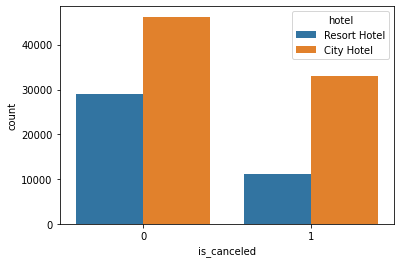

In [ ]:
sns.countplot(x="is_canceled",hue="hotel",data=hotel)

We can see that the cancellation rate is pretty high, 1/3 of the overall bookings. I don't think this is a good thing for the hotel side. We could make further analysis by using predictive analysis regarding the cancellation rate, but let's focus on EDA for now.

### 3. Do people who keep changing their plan, more likely or unlikely to cancel their bookings?

Let's first see the big picture of the values in booking_changes column. Just to understand the data a little bit better.

In [ ]:
hotel["booking_changes"].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
20         1
18         1
21         1
Name: booking_changes, dtype: int64

Note that the total count for value 0 to 5 is considerably a lot. Let's see how it affects our visualization. For plotting categorical data with another categorical data, I would first think of scatter plot, strip plot, and such. Here, I will use strip plot with jitter=True so that we can understand a little bit about the total count for each value.

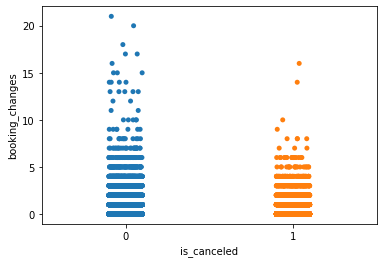

In [ ]:
sns.stripplot(x="is_canceled", y="booking_changes", data=hotel, jitter=True)

Now we could understand, one of the shortcomings on using strip plot is that it is unreliable for big data. Here, we could not really get how many cancelation are actually made at certain booking change value. It all seems similar between booking change value 0-5, but is that really true?


Hence, I would like to dive deeper into the real number regarding this relationship between booking changes with the cancellation to prove this.

In [ ]:
hotel["booking_changes"].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [ ]:
len(hotel)

119390

In [ ]:
hotel["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
count=0
count_changes=[]

for changes in hotel["booking_changes"].unique():
  for i in range(len(hotel)):
    if (hotel["booking_changes"][i]==changes) & (hotel["is_canceled"][i]==1):
      count+=1
  # count_changes.append(changes)
  count_changes.append(count)
  count=0

In [ ]:
count_changes

[144, 67, 41391, 1807, 766, 20, 0, 18, 4, 3, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]

I would like to check if my algorithm is correct, then the sum of count_changes must be the same with the total "1" value in the is_canceled column.

In [ ]:
sum(count_changes)

44224

yup, it's correct! We can continue visualizing the data with the new information we got. I'm thinking of using pie plot. We can understand the proportion better than using strip plot as we have previously tried.

Since I am trying to make pie plot for quite a lot different values of booking_changes, we can imagine that the pie plot would be so crowded, if we do not "explode" the diagram. I will give you illustration.

([<matplotlib.patches.Wedge at 0x7fac066c8320>,
 [Text(1.099942447049479, 0.011252252165873833, '3'),
  Text(1.0996502319934045, 0.02773747062823085, '4'),
  Text(-1.0839054638255932, 0.1874805202921781, '0'),
  Text(1.0673753161741804, -0.2659133964697316, '1'),
  Text(1.09792873727005, -0.06747212666423015, '2'),
  Text(1.0999831147222585, -0.00609486061520458, '5'),
  Text(1.09999066387979, -0.004532038978104824, '17'),
  Text(1.0999955596740454, -0.0031254915427789466, '6'),
  Text(1.099999100963146, -0.0014063713133094543, '8'),
  Text(1.0999996643045515, -0.0008593776085381554, '7'),
  Text(1.0999998640905286, -0.0005468096731560362, '10'),
  Text(1.0999999306771286, -0.00039052568733053956, '16'),
  Text(1.0999999750594676, -0.00023424169362201125, '9'),
  Text(1.0999999889240388, -0.00015609969479843115, '13'),
  Text(1.0999999889240388, -0.00015609969479843115, '12'),
  Text(1.0999999889240388, -0.00015609969479843115, '20'),
  Text(1.0999999972375445, -7.795769518612894e-05, 

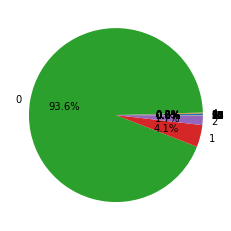

In [ ]:
plt.pie(count_changes,labels=hotel["booking_changes"].unique(), autopct='%1.1f%%')

See, we could not really see the numbers in the chart! except maybe the top 3. I assume that "exploding" the chart would give us better visualization. Let's try!

In [ ]:
a=0
explodes=[]
for i in range(len(count_changes)):
  explodes.append(a)
  a+=0.2

explodes

[0,
 0.2,
 0.4,
 0.6000000000000001,
 0.8,
 1.0,
 1.2,
 1.4,
 1.5999999999999999,
 1.7999999999999998,
 1.9999999999999998,
 2.1999999999999997,
 2.4,
 2.6,
 2.8000000000000003,
 3.0000000000000004,
 3.2000000000000006,
 3.400000000000001,
 3.600000000000001,
 3.800000000000001,
 4.000000000000001]

([<matplotlib.patches.Wedge at 0x7fac0678dc50>,
 [Text(1.099942447049479, 0.011252252165873833, '3'),
  Text(1.299586637810387, 0.03278064710609101, '4'),
  Text(-1.478052905216718, 0.2556552549438792, '0'),
  Text(1.6495800340873696, -0.4109570672714034, '1'),
  Text(1.8964223643755407, -0.11654276423821572, '2'),
  Text(2.099967764469766, -0.011635642992663288, '5'),
  Text(2.2999804790213787, -0.009476081499673723, '17'),
  Text(2.499989908350103, -0.00710338986995215, '6'),
  Text(2.6999977932731762, -0.003452002314486842, '8'),
  Text(2.899999114984727, -0.002265631877055137, '7'),
  Text(3.0999996169823985, -0.0015410090788942836, '10'),
  Text(3.2999997920313855, -0.0011715770619916185, '16'),
  Text(3.49999992064376, -0.0007453144797063993, '9'),
  Text(3.699999962744494, -0.0005250626097765411, '13'),
  Text(3.899999960730683, -0.0005534443724671649, '12'),
  Text(4.0999999587168725, -0.0005818261351577888, '20'),
  Text(4.299999989201311, -0.0003047437175457768, '14'),
  Text

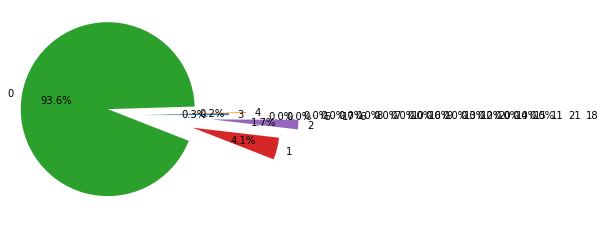

In [ ]:
plt.pie(count_changes,labels=hotel["booking_changes"].unique(), explode=explodes, autopct='%1.1f%%')

We can also use barplot, which could be not as messy as pie chart, but we don't get the proportion, just the total count of each booking_changes value.

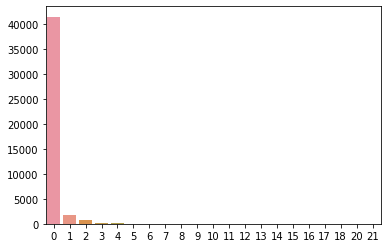

In [ ]:
sns.barplot(x=hotel["booking_changes"].unique(),y=count_changes)

We learned that sometimes, we have to preprocess further some data to get better understanding of certain datas and to be able to visualize that in a more understandable manner.

### 4. Do people who have the record of canceling their plan are more likely to cancel again?

In [ ]:
hotel["previous_cancellations"].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

similarly as the previous question, we could also try with the strip plot first.

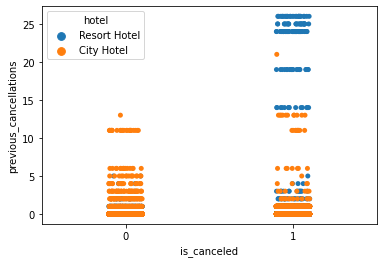

In [ ]:
sns.stripplot(x="is_canceled", y="previous_cancellations", data=hotel, jitter=True, hue="hotel")

Interesting.. We kinda get the big picture here. the more cancellation people made previously, the more likely they cancel in the current booking, especially true for more than 13 cancellations before.

Now now, I would also like to further check how different is the trend of cancellation between the two hotels, in term of the guest's record of canceling their plans? This could actually done in the previous sections, but I would like to show some different EDA for each section. haha. Especially that there are some interesting different of trend happening there by looking at the chart! The higher the previous cancellations, it seems the guests of Resort Hotel are more likely to cancel rather than the City Hotel's. Let's deep dive into the numbers!

In [ ]:
previous_resort=hotel[hotel["hotel"]=="Resort Hotel"][["previous_cancellations","is_canceled"]]
previous_city=hotel[hotel["hotel"]=="City Hotel"][["previous_cancellations","is_canceled"]]

Text(0.5, 1.0, 'Resort Hotel')

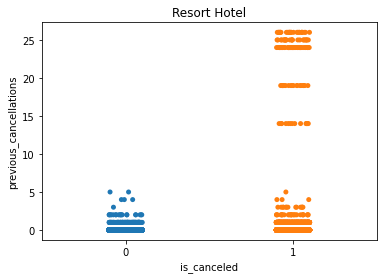

In [ ]:
sns.stripplot(x="is_canceled", y="previous_cancellations", data=previous_resort, jitter=True)
plt.title("Resort Hotel")

Text(0.5, 1.0, 'City Hotel')

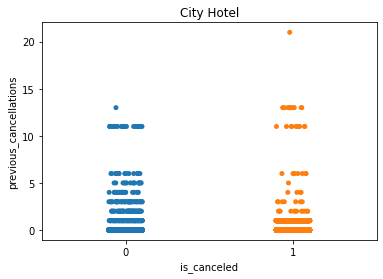

In [ ]:
sns.stripplot(x="is_canceled", y="previous_cancellations", data=previous_city, jitter=True)
plt.title("City Hotel")

Let's put it side by side for better visualization.

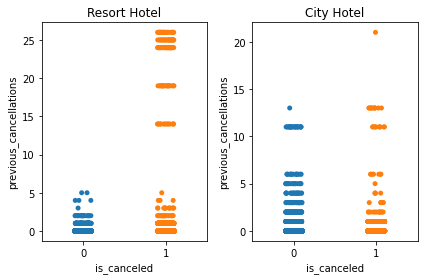

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
# fig=plt.figure(figsize=(12,20))

sns.stripplot(x="is_canceled", y="previous_cancellations", data=previous_resort, jitter=True, ax=ax1)
ax1.set_title("Resort Hotel")

sns.stripplot(x="is_canceled", y="previous_cancellations", data=previous_city, jitter=True, ax=ax2)
ax2.set_title("City Hotel")

plt.tight_layout()

Now it is clearer that more guests who made cancellations previously for Resort Hotel more likely to cancel at the present booking.

In [ ]:
# hotel.groupby("hotel")["previous_cancellations"].value_counts()

hotel         previous_cancellations
City Hotel    0                         73941
              1                          5155
              2                            72
              3                            51
              11                           35
              4                            25
              6                            22
              5                            16
              13                           12
              21                            1
Resort Hotel  0                         38965
              1                           896
              24                           48
              2                            44
              26                           26
              25                           25
              19                           19
              3                            14
              14                           14
              4                             6
              5                            

### 5. Do people who plan their trip shortly before are more likely or unlikely to cancel the bookings?

In [ ]:
hotel["lead_time"]

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64

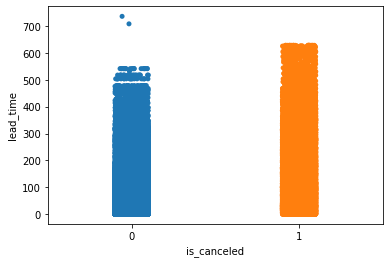

In [ ]:
sns.stripplot(x="is_canceled",y="lead_time",data=hotel, jitter=True)

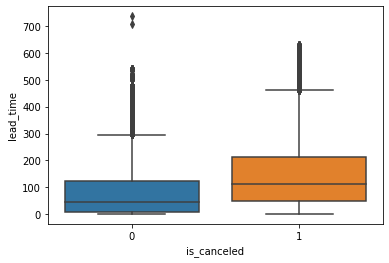

In [ ]:
sns.boxplot(x="is_canceled", y="lead_time", data=hotel)

According to the stripplot and boxplot, we can conclude that the longer the lead time seems to lead to higher cancellation. Which makes sense, since sudden plans usually the ones most likely to happen right? haha

### 6. How has the cancelation rate changed year by year?

In [ ]:
hotel.groupby("arrival_date_year")["is_canceled"].value_counts()

arrival_date_year  is_canceled
2015               0              13854
                   1               8142
2016               0              36370
                   1              20337
2017               0              24942
                   1              15745
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Cancellation Throughout the Year')

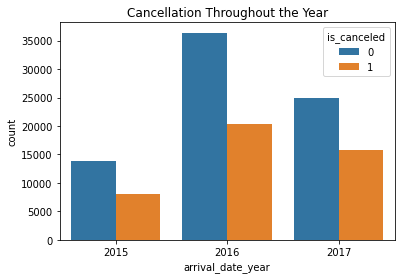

In [ ]:
sns.countplot(hotel["arrival_date_year"], hue=hotel["is_canceled"])
plt.title("Cancellation Throughout the Year")

Kindly note that the above graph could be a little bit misleading, considering that Year 2015 and 2017 datas are not for the whole year, but rather for second half for the Year 2015 and the first half for the Year 2017. But my point for this section is that we could visualize the proportion using countplot for similar case.

### 7. How is the proportion of repeated customers do they have compared to new guests?

In [ ]:
hotel["is_repeated_guest"].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

([<matplotlib.patches.Wedge at 0x7fac063dbda0>,
 [Text(-1.09447652566627, 0.11009602520295811, '0'),
  Text(1.0944765295317447, -0.11009598677585064, '1')],
 [Text(-0.5969871958179654, 0.060052377383431686, '96.8%'),
  Text(0.5969871979264061, -0.060052356423191254, '3.2%')])

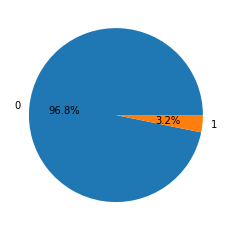

In [ ]:
plt.pie(hotel["is_repeated_guest"].value_counts(), labels=[0,1],autopct='%1.1f%%')

See, it is more informative and clean to use pie chart for only a few categories (maybe for around 2-5 categories is still suitable).

We can see that there are only 3.2% of the customers are repeated customers. But for the span of 2 years? I think it is pretty good!

It must be interesting to also check where are these repeated customers came from. If they are from overseas, it is a great news, don't you think?

In [ ]:
hotel[hotel["is_repeated_guest"]==1].groupby("country").count()["hotel"].sort_values(ascending=False)

country
PRT    3250
GBR     107
ESP      90
FRA      78
ITA      40
IRL      31
DEU      25
NLD      20
USA      19
AGO      18
BEL      17
BRA      14
AUT      11
SWE      10
TUR       9
CHN       8
PRI       6
POL       5
CN        5
LUX       4
GRC       4
CHE       3
ISR       3
RUS       3
JPN       3
FIN       2
MAR       2
DZA       2
AUS       2
NOR       2
SVN       2
ISL       1
ARE       1
ARG       1
TUN       1
NGA       1
PER       1
MOZ       1
DNK       1
LBN       1
KOR       1
ZAF       1
Name: hotel, dtype: int64

Now now, it seems a lot of the repeated guests are from PRT. We all know that there are a lot of tourist from PRT everywhere. The question now, is this repeated guest is the travel agent? Because it would be a whole different story if the repeated guests are because of the travel agents, not individuals.

In [ ]:
hotel[hotel["is_repeated_guest"]==1].groupby("country")["customer_type"].value_counts()["PRT"]

customer_type
Transient          2638
Transient-Party     476
Group               116
Contract             20
Name: customer_type, dtype: int64

What a good news! most of them are from Transient bookings! Which means that they are not associated to any travel agency whatsoever.

let's also compare the datas between the two hotels!

In [ ]:
hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="Resort Hotel")].groupby("country")["customer_type"].value_counts()

country  customer_type  
AGO      Transient             3
AUS      Group                 1
AUT      Transient-Party       3
         Group                 1
BEL      Transient             6
         Transient-Party       1
BRA      Transient             5
         Group                 2
CHE      Transient             2
CHN      Transient             6
CN       Transient             5
DEU      Transient             4
         Transient-Party       2
ESP      Transient            36
         Group                 1
FIN      Transient             2
FRA      Transient            14
         Group                 1
         Transient-Party       1
GBR      Transient            49
         Transient-Party      16
         Group                15
         Contract             12
IRL      Transient            24
         Group                 2
         Transient-Party       2
ISL      Transient             1
ITA      Transient-Party      12
         Transient             9
         Group    

In [ ]:
hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="Resort Hotel")].groupby("country")["customer_type"].value_counts()["PRT"]

customer_type
Transient          1251
Transient-Party     150
Group                86
Contract              7
Name: customer_type, dtype: int64

In [ ]:
hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="City Hotel")].groupby("country")["customer_type"].value_counts()["PRT"]

customer_type
Transient          1387
Transient-Party     326
Group                30
Contract             13
Name: customer_type, dtype: int64

Interesting! it seems both of the hotels have equally good reputation that they have non-tour-related repeated guests...

Let's further visualize the data.

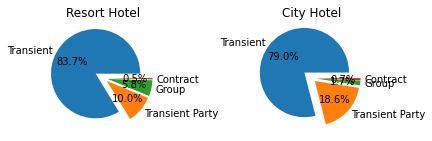

In [ ]:
plt.subplot(1,2,1)
plt.pie(hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="Resort Hotel")].groupby("country")["customer_type"].value_counts()["PRT"],labels=["Transient","Transient Party","Group","Contract"],autopct='%1.1f%%', explode=[0.2,0.1,0.1,0.1])
plt.title("Resort Hotel")

plt.subplot(1,2,2)
plt.pie(hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="City Hotel")].groupby("country")["customer_type"].value_counts()["PRT"], labels=["Transient","Transient Party","Group","Contract"],autopct='%1.1f%%', explode=[0.2,0.1,0.1,0.1])
plt.title("City Hotel")

plt.tight_layout()

### 8. How long do people with children and babies stay in general? are they staying for longer time or shorter time?

In [ ]:
hotel["total_stay_nights"]=hotel["stays_in_weekend_nights"]+hotel["stays_in_week_nights"]

In [ ]:
hotel["kids"]=hotel["children"]+hotel["babies"]

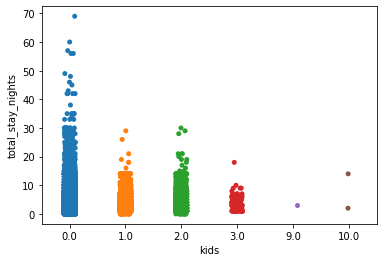

In [ ]:
sns.stripplot(x="kids", y="total_stay_nights", data=hotel)

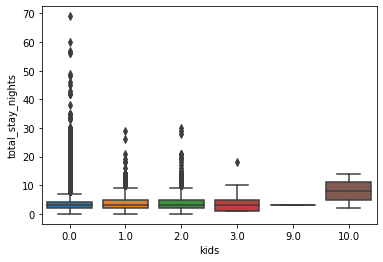

In [ ]:
sns.boxplot(x="kids", y="total_stay_nights", data=hotel)

Let's compared the total_stay_nights between the families with **children** and families with **babies**, and exclude the canceled bookings, because it might be caused by wrong input.

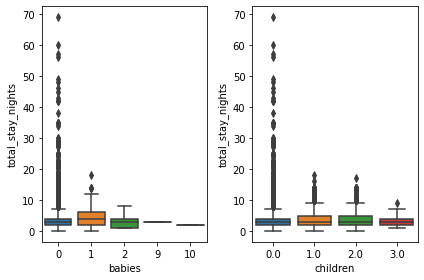

In [ ]:
fig, (ax1, ax2)=plt.subplots(ncols=2)

sns.boxplot(x=hotel[hotel["is_canceled"]==0]["babies"], y=hotel["total_stay_nights"], ax=ax1)
sns.boxplot(x=hotel[hotel["is_canceled"]==0]["children"], y=hotel["total_stay_nights"], ax=ax2)

plt.tight_layout()

It is as expected, that when people staying at a hotel and bring along children, they would not spend too many nights, especially for children (not babies) considering their schools. 

### 9. How often do people get different assigned_room_type from their reserved_room_type?

In [ ]:
count_different=0
count_same=0

for i in range(len(hotel)):
  if hotel["reserved_room_type"][i]!=hotel["assigned_room_type"][i]:
    count_different+=1
  else:
    count_same+=1

print(f"Total different assigned room is {count_different}")
print(f"Total same assigned room is {count_same}")

Total different assigned room is 14917
Total same assigned room is 104473


In [ ]:
hotel["change_room"]=0

In [ ]:
for i in range(len(hotel)):
  if hotel["reserved_room_type"][i]!=hotel["assigned_room_type"][i]:
    hotel["change_room"][i]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
hotel["change_room"].value_counts()

0    104473
1     14917
Name: change_room, dtype: int64

Text(0.5, 1.0, 'How Often Do People Get Different Assigned Room Type from Their Reserved Room Type?')

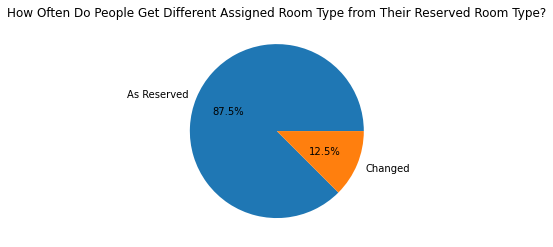

In [ ]:
plt.pie(hotel["change_room"].value_counts(),labels=["As Reserved","Changed"], autopct='%1.1f%%')
plt.title ("How Often Do People Get Different Assigned Room Type from Their Reserved Room Type?")